In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Data Profiling

In [202]:
df=pd.read_csv('Jamboree_Admission.csv')
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [203]:
df.shape

(500, 9)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [205]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [207]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces

# Exploratory Data Analysis

### Null value check

In [206]:
#Checking for NULL values
print(df.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


<Axes: xlabel='Chance of Admit', ylabel='Count'>

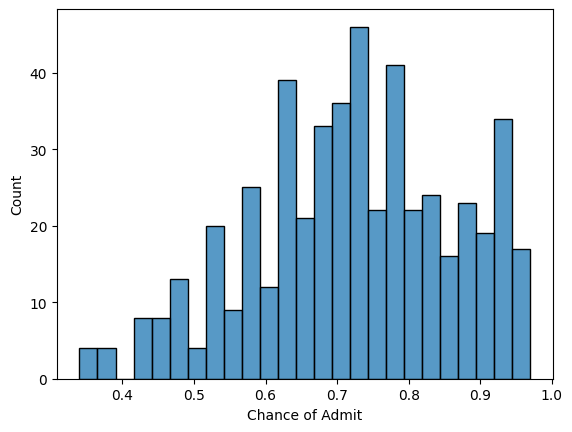

In [208]:
sns.histplot(data=df,x='Chance of Admit',bins=25)

## Outlier Handling

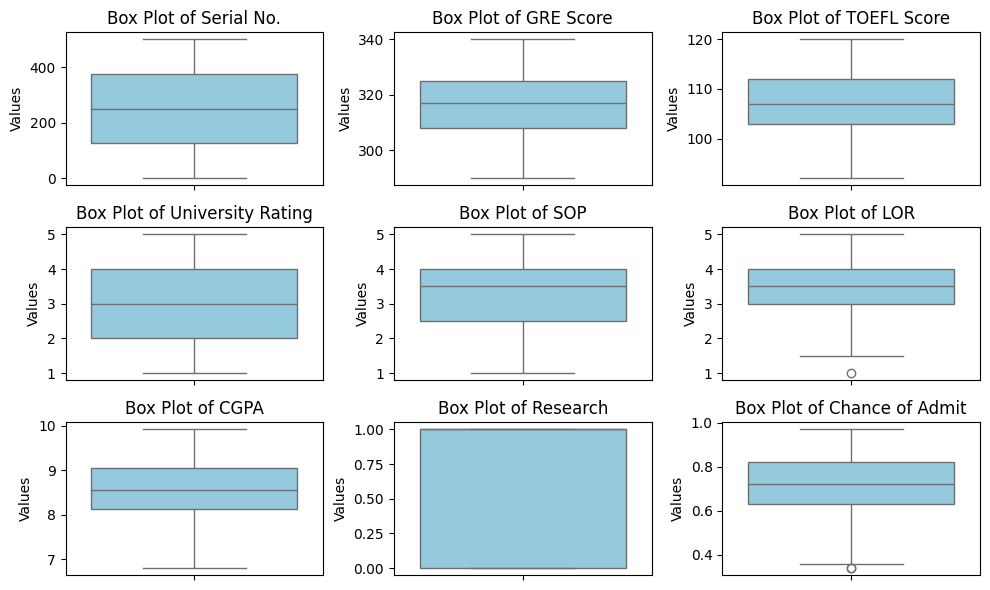

In [209]:
# Select numerical columns
num_cols = df.select_dtypes(include=['number']).columns

# Define grid layout
num_features = len(num_cols)
rows = (num_features // 3) + (num_features % 3 > 0)  # number of rows for the grid
cols = min(3, num_features)  # max 3 columns in the grid

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 2))

# Flatten axes array to index easier (from 2D to 1D)
axes = axes.flatten()

# Loop through the columns and plot each boxplot on its corresponding axis
for i, col in enumerate(num_cols):
    ax = axes[i]  # Current axis
    sns.boxplot(y=df[col], ax=ax, color='skyblue')  # Plot the boxplot
    ax.set_title(f'Box Plot of {col}', fontsize=12)  # Set the title
    ax.set_ylabel('Values')  # Set the ylabel

# If there are unused subplots (e.g., more subplots than columns), remove them
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to make it cleaner
plt.show()

As per this box-plot grid for every numerical feature of data, we should not be much bothered about outlier handling as data seems to be pretty clean.

## Assumptions of Linearity

### Check for Linearity using Pairplots and *Correlation*

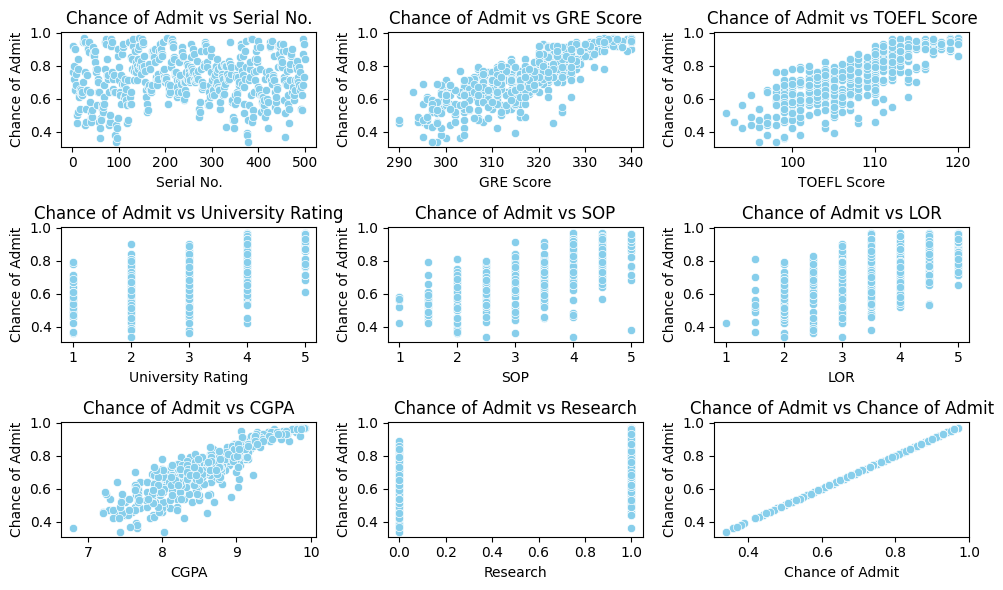

In [210]:
y_var='Chance of Admit'
# Create a subplot grid
fig, axes = plt.subplots(rows, cols, figsize=(10, 2 * rows))
axes = axes.flatten()  # Flatten to easily index the axes

# Loop through each x-variable and create a scatter plot
for i, col in enumerate(num_cols):
    sns.scatterplot(x=df[col], y=df[y_var], ax=axes[i], color='skyblue')
    axes[i].set_title(f'{y_var} vs {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(y_var)

# Adjust the layout to avoid overlapping subplots
plt.tight_layout()
plt.show()

Observation :

1. We can clearly eliminate Serial No. as its irelevant to our output.
2. GRE score , TOEFL score, CGPA show a very strong linearity with the chance of admit.
3. SOP and LOR show some moderate lineraity whereas Research and University ranking is not showing clear instances of linearity in scatter plot.

In [211]:
numeric_df=df[num_cols]
correlation_matrix=numeric_df.corr()
correlation_matrix

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


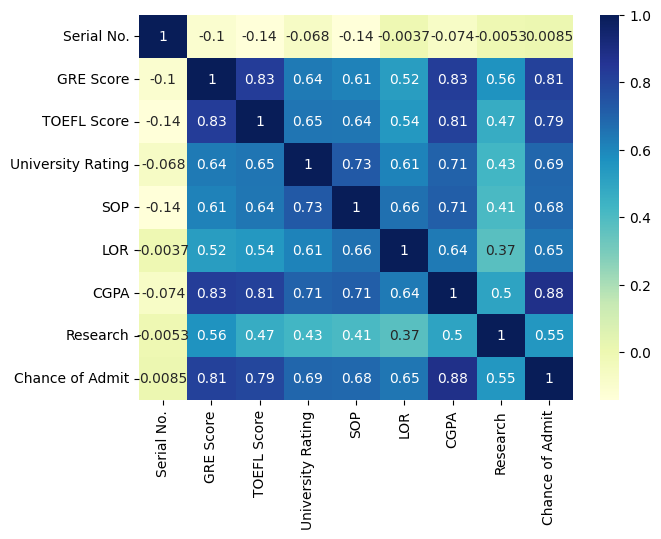

In [212]:
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix,annot=True,cmap='YlGnBu')
plt.show()

### Check for Normality of residuals

In [213]:
# lets train a temporary Linear Regression model for checking Normality of residuals and will use it further to check for heteroskadasticity

In [214]:
X=df.drop('Chance of Admit',axis=1)
y=df['Chance of Admit']
model_temp=LinearRegression()
model_temp.fit(X,y)
y_pred=model_temp.predict(X)
residuals=y-y_pred



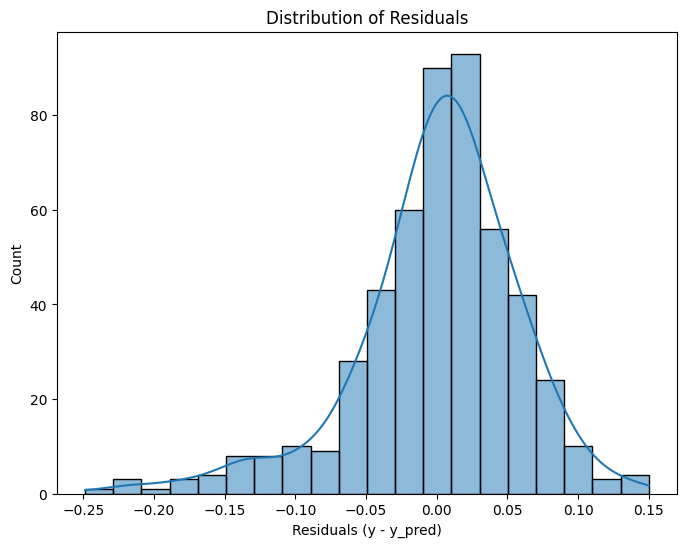

In [215]:
# **Residuals Histogram**
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True)
plt.xlabel("Residuals (y - y_pred)")
plt.title("Distribution of Residuals")
plt.show()

Hist Plot of Residuals show that (y-ycap) are destributed fairly normal and hence maximum predictions are mapped against zero error or nearby , leading to a fact that distribution of loss function shall be a convex function with golbal minima as an ideal point where our gradient descent shall converge for ideal weights.

### Check for Heteroskadasticity

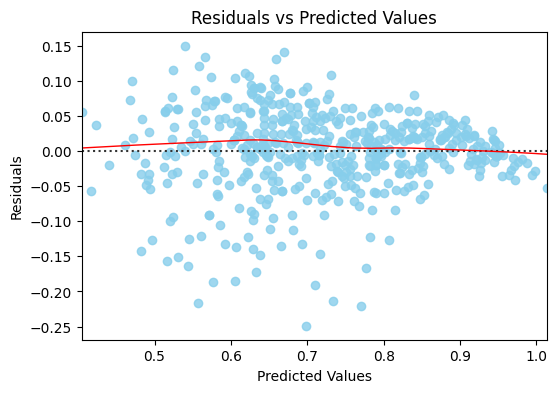

In [216]:
# Scatter plot of residulas vs y_predicted

#check for heteroscadasticity
#Scatter plot of residuals vs predicted
#!pip install statsmodels
plt.figure(figsize=(6, 4))
sns.residplot(x=y_pred, y=residuals,lowess=True, color='skyblue', line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


Plot shows no such distribution that may lead us to the issues of heteroskadasticity hence its closer to homoskadasticity that is good for our linear regression model.

### Check for Multicolinearity

In [217]:
# Selecting independent variables (drop target variable)
X = df[['GRE Score', 'TOEFL Score', 'CGPA', 'University Rating', 'SOP', 'LOR', 'Research']]

# Adding a constant column for VIF calculation
X = sm.add_constant(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop constant term (first row)
vif_data = vif_data.iloc[1:]

# Print VIF scores
print(vif_data)

             Feature       VIF
1          GRE Score  4.464249
2        TOEFL Score  3.904213
3               CGPA  4.777992
4  University Rating  2.621036
5                SOP  2.835210
6                LOR  2.033555
7           Research  1.494008


VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity among independent variables. A high VIF (>5 or 10) indicates multicollinearity.Whereas in our observation we cant see any VIF value above 5. Hence there is no evidence of multicolinearity as well.

# Training Models

In [218]:
#Extract X and y from data frame first
X=df.drop(['Chance of Admit','Serial No.'],axis=1)
y=df['Chance of Admit']

## Simple Linear Regression Model

In [219]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model1=make_pipeline(StandardScaler(),LinearRegression())
model1.fit(X_train,y_train)
model1.score(X_test,y_test)



0.8188432567829627

A simple Linear Regression model yield a R2 score of 0.8188432567829627. Lets try increase it using other complex arrangements further like polynomial features followed by regression.

## Polynomial Regression Model

In [220]:
# Make data splits into training data,validation data and test data.
X_tr_cv,X_test,y_train_cv,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train,X_val,y_train,y_val=train_test_split(X_tr_cv,y_train_cv,test_size=0.25,random_state=1)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(300, 7)
(100, 7)
(100, 7)


In [221]:
def adj_r2(X,Y, r2):

    res = (1 - ((1-r2)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
    return res

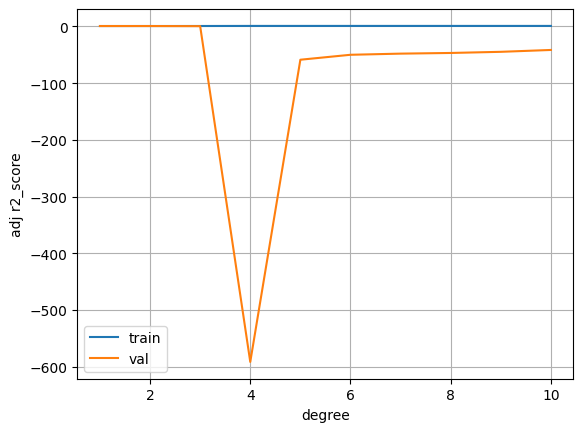

In [222]:
# Find best degree for polynomial regression, Hyper Parameter Tuning for polynomial degree.

max_degree=11
train_scores=[]
val_scores=[]

for degree in range(1,max_degree):
  poly_reg_scaled=make_pipeline(PolynomialFeatures(degree=degree),StandardScaler(),LinearRegression())
  poly_reg_scaled.fit(X_train,y_train)

  train_score=adj_r2(X_train,y_train,poly_reg_scaled.score(X_train,y_train))
  val_score=adj_r2(X_val,y_val,poly_reg_scaled.score(X_val,y_val))

  train_scores.append(train_score)
  val_scores.append(val_score)

plt.figure()
plt.plot(range(1,max_degree),train_scores,label='train')
plt.plot(range(1,max_degree),val_scores,label='val')
plt.xlabel('degree')
plt.ylabel('adj r2_score')
plt.legend()
plt.grid()
plt.show()


In [223]:
np.argmax(val_scores)+1

# We can see that best degree is 1 that means polynomial features of greter degree doesnot help much.

1

In [224]:
#Train polynomial regression model with degree=1
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model2=make_pipeline(PolynomialFeatures(degree=1),StandardScaler(),LinearRegression())
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.8188432567829628

## Ridge Regression Model (L2 Regularization)

Now lets introduce some flavours of regularization. We will keep polynomial degree = 1.

In [225]:
# Make data splits into training data,validation data and test data.
X_tr_cv,X_test,y_train_cv,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train,X_val,y_train,y_val=train_test_split(X_tr_cv,y_train_cv,test_size=0.25,random_state=1)

In [226]:
#Hyper Parameter tuning for regularization parameter alpha

train_scores = []
val_scores = []

lambda_list = np.arange(0.01, 50, 0.1)

for rate in lambda_list: # [0.01, 0.1, 1, 5, 10]
  polyreg_scaled = make_pipeline(PolynomialFeatures(2), StandardScaler(), Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)

  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))

  train_scores.append(train_score)
  val_scores.append(val_score)

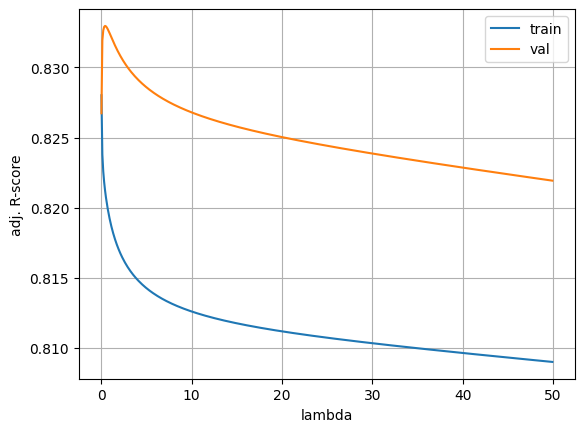

In [227]:
plt.figure()
plt.plot(lambda_list, train_scores, label="train")
plt.plot(lambda_list, val_scores, label="val")
plt.legend()
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

In [228]:
#Best Lambda
lambda_list[np.argmax(val_scores)]

0.41000000000000003

In [229]:
#Train Ridge model with alpha=0.41

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model3=make_pipeline(PolynomialFeatures(degree=1),StandardScaler(),Ridge(alpha=0.41))
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.8188208971153297

We can see a clear decline in performance as score is 0.81882089711 for ridge as compared to simple linear regression. This shows regularization is not helping here and is unecessary. Intuition says that since we are not working with higher degree polynomial features, regularization is unnecessary and does not helps.

## Lasso Regression model (L1 Regularizzation)

In [230]:
# Make data splits into training data,validation data and test data.
X_tr_cv,X_test,y_train_cv,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X_train,X_val,y_train,y_val=train_test_split(X_tr_cv,y_train_cv,test_size=0.25,random_state=1)

In [231]:
#Hyper Parameter tuning for regularization parameter alpha

train_scores = []
val_scores = []

lambda_list = np.arange(0.01, 50, 0.1)

for rate in lambda_list: # [0.01, 0.1, 1, 5, 10]
  polyreg_scaled = make_pipeline(PolynomialFeatures(2), StandardScaler(), Lasso(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)

  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))

  train_scores.append(train_score)
  val_scores.append(val_score)

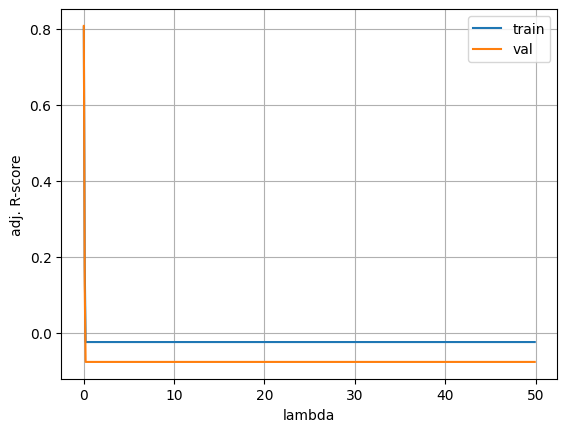

In [232]:
plt.figure()
plt.plot(lambda_list, train_scores, label="train")
plt.plot(lambda_list, val_scores, label="val")
plt.legend()
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

In [233]:
#Best Lambda
lambda_list[np.argmax(val_scores)]

0.01

In [234]:
#Train Lasso model with alpha=0.01

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model4=make_pipeline(PolynomialFeatures(degree=1),StandardScaler(),Lasso(alpha=0.01))
model4.fit(X_train,y_train)
model4.score(X_test,y_test)

0.8139953985227919

Here accuracy further declines and reason is potentially same as that of why accuracy declined in Ridge that regularization seems unecessary when polynomial features degree is not complex. Moreover this performance is worse than ridge because L1 regularizatioin makes weights 0 unlike L2 regularization which just reduces. Hence we may loose features in L1 regularization due to its sparse feature property.

In [235]:
print(model4)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.01))])


In [236]:
print(model4.named_steps["lasso"].coef_)

[0.         0.02624005 0.01513663 0.00091904 0.         0.01111117
 0.06895746 0.00609861]
